In [1]:
import pandas as pd
import numpy as np

iris_data = pd.read_csv("./data/iris.csv",sep=",",names=["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width","Class"])
iris_data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
grouped_data = iris_data.groupby("Class")

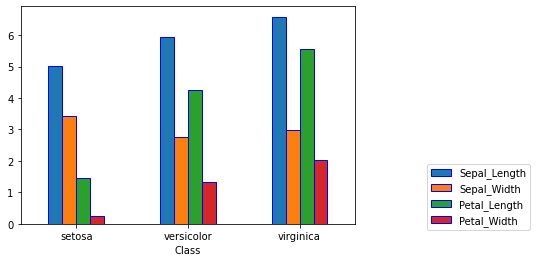

In [3]:
group_mead = grouped_data.mean()
group_mead.plot(kind="bar",edgecolor="b")
plt.legend(bbox_to_anchor=(1.2,0.3),loc="upper left",ncol=1)
plt.xticks(rotation=0)
plt.show()

In [4]:
msk =np.random.rand(len(iris_data))<0.8
train_data = iris_data[msk]
test_data = iris_data[~msk]

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

train_label = train_data["Class"]
test_label = test_data["Class"]

train = train_data.drop("Class",1)
test = test_data.drop("Class",1)

In [5]:
train = (train-train.min())/(train.max()-train.min())
test = (test-test.min())/(test.max()-test.min())

In [6]:
def getAccurancy(testSet,predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))*100.0

In [7]:
from sklearn import neighbors

In [8]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(train,train_label)

KNeighborsClassifier(n_neighbors=3)

In [9]:
predict = knn.predict(test)

In [10]:
accuracy = getAccurancy(test_label,predict)
print("Accuracy:{:.2f}%".format(accuracy))

Accuracy:90.62%
